In [3]:
from my_weapon import *
from tqdm.notebook import tqdm

sns.set(style="darkgrid", font_scale=1.5)
plt.style.use('fivethirtyeight')

fig/results-14days-v1-0.5.png
fig/results-14days-v1-0.5.png
fig/results-14days-v2-0.5.png
fig/results-14days-v2-0.5.png
fig/results-14days-v1-0.66.png
fig/results-14days-v1-0.66.png
fig/results-14days-v2-0.66.png
fig/results-14days-v2-0.66.png


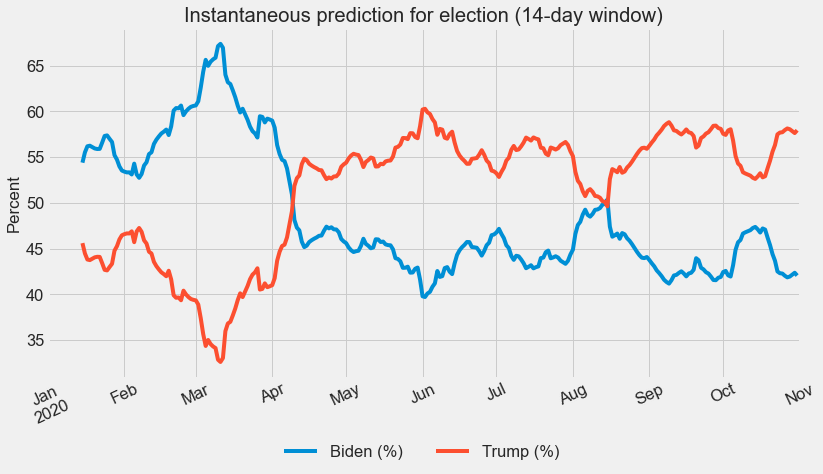

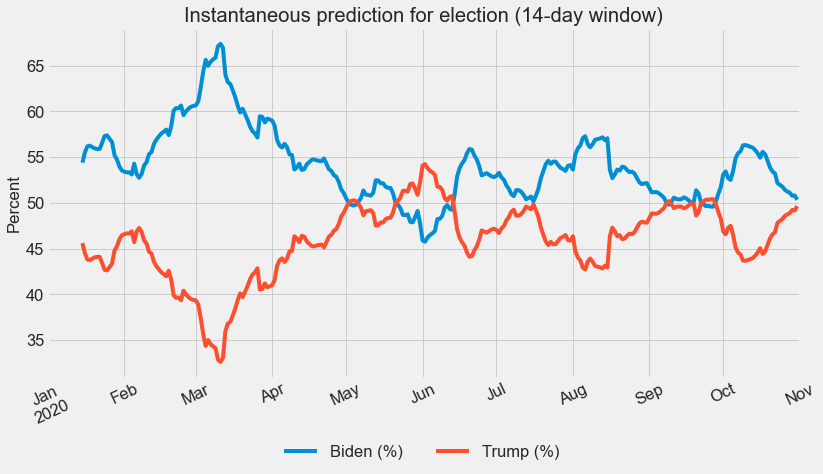

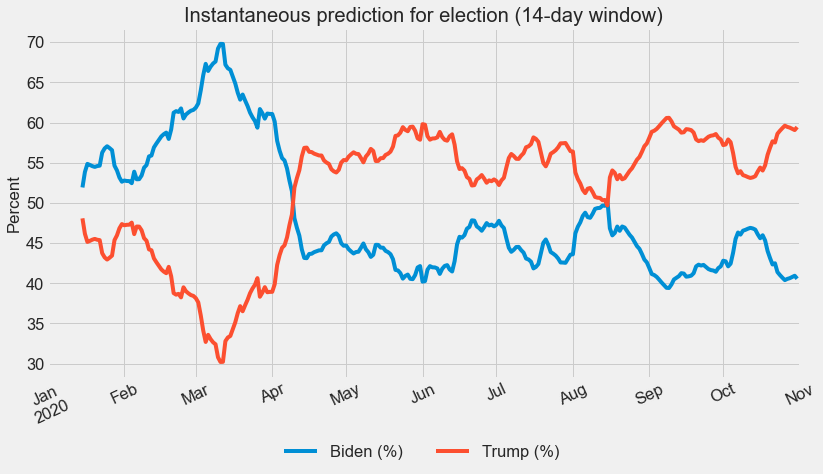

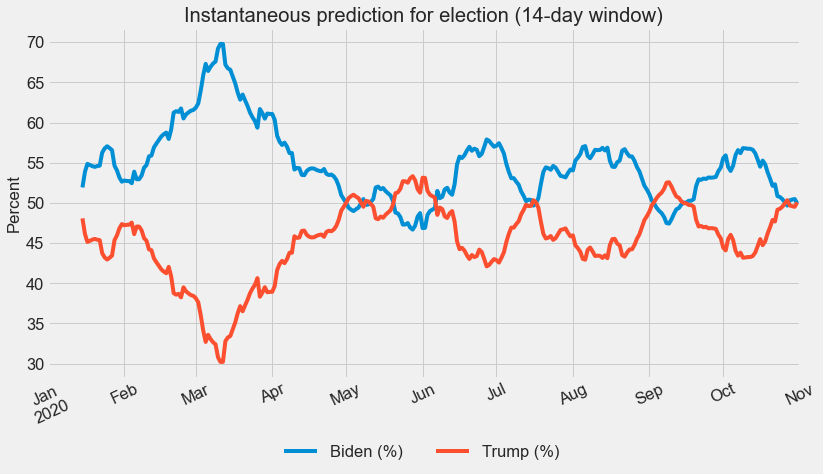

In [25]:
def plot_14days(data, figname):
    print(figname)
    data.index = pd.to_datetime(data.index)
    plt.figure(figsize=(12, 6))
    # data = data.rename(columns={'0':"Biden", '1': "Trump", "2": "Undecided"})
    # data["Biden (%)"] = data["Biden"] / (data["Biden"] + data["Trump"] + data["Undecided"]) * 100
    # data["Trump (%)"] = data["Trump"] / (data["Biden"] + data["Trump"] + data["Undecided"]) * 100
    # data["Undecided (%)"] = data["Undecided"] / (data["Biden"] + data["Trump"] + data["Undecided"]) * 100
    # data["Biden (%)"].plot()
    # data["Trump (%)"].plot()
    # data["Undecided (%)"].plot()

    data["Biden (%)"] = data["Biden"] / (data["Biden"] + data["Trump"]) * 100
    data["Trump (%)"] = data["Trump"] / (data["Biden"] + data["Trump"]) * 100
    data["Biden (%)"].plot()
    data["Trump (%)"].plot()

    plt.xlabel("")
    # plt.ylim(0, 70)
    xticks = pd.date_range("2020-01-01", "2020-11-01", freq='MS')
    # print(xticks)
    plt.xticks([x.strftime('%Y-%m-%d') for x in xticks], rotation=25)
    plt.ylabel("Percent")

    plt.legend(loc=1, bbox_to_anchor=(0.7, -0.15), ncol=3, frameon=False)
    plt.title(f"Instantaneous prediction for election (14-day window)")
    plt.savefig(figname, dpi=300, bbox_inches ='tight')
    print(figname)
    # plt.show()
    # plt.close()


data = pd.read_csv("data/csv/14days-from-2020-01-14-to-2020-10-31-v1-0.5.csv").set_index("dt")
plot_14days(data, "fig/results-14days-v1-0.5.png")

data = pd.read_csv("data/csv/14days-from-2020-01-14-to-2020-10-31-v2-0.5.csv").set_index("dt")
plot_14days(data, "fig/results-14days-v2-0.5.png")

data = pd.read_csv("data/csv/14days-from-2020-01-14-to-2020-10-31-v1-0.66.csv").set_index("dt")
plot_14days(data, "fig/results-14days-v1-0.66.png")

data = pd.read_csv("data/csv/14days-from-2020-01-14-to-2020-10-31-v2-0.66.csv").set_index("dt")
plot_14days(data, "fig/results-14days-v2-0.66.png")

fig/results-cumFrom01-v1-0.5.png
fig/results-cumFrom01-v2-0.5.png
fig/results-cumFrom01-v1-0.66.png
fig/results-cumFrom01-v1-0.66.png


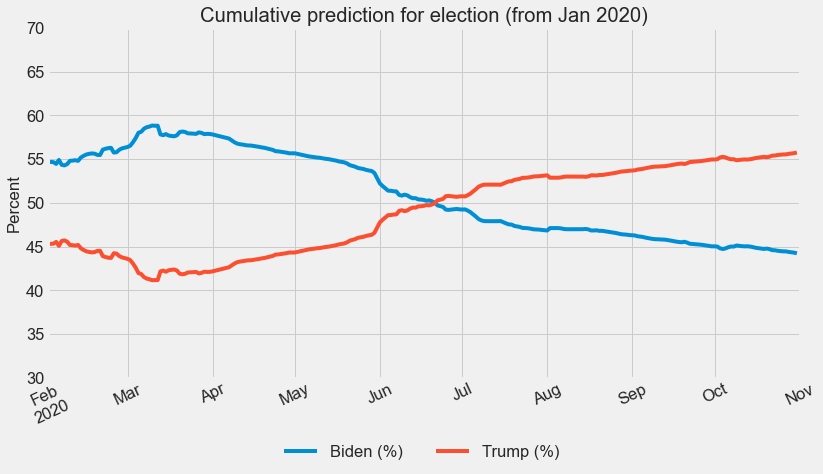

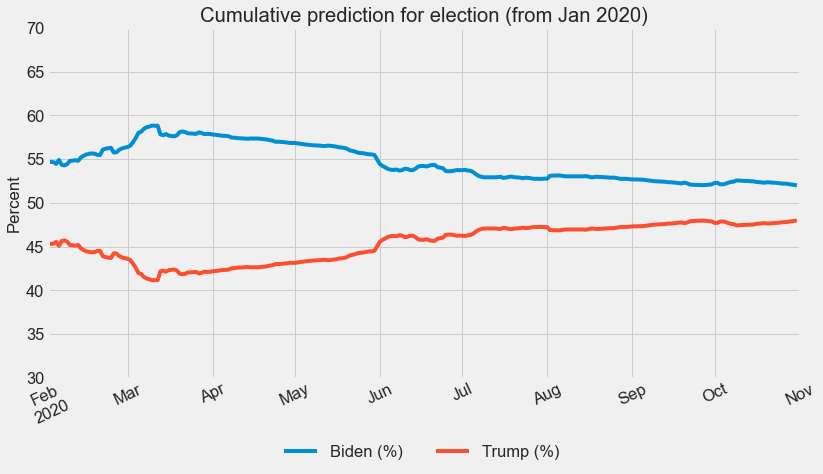

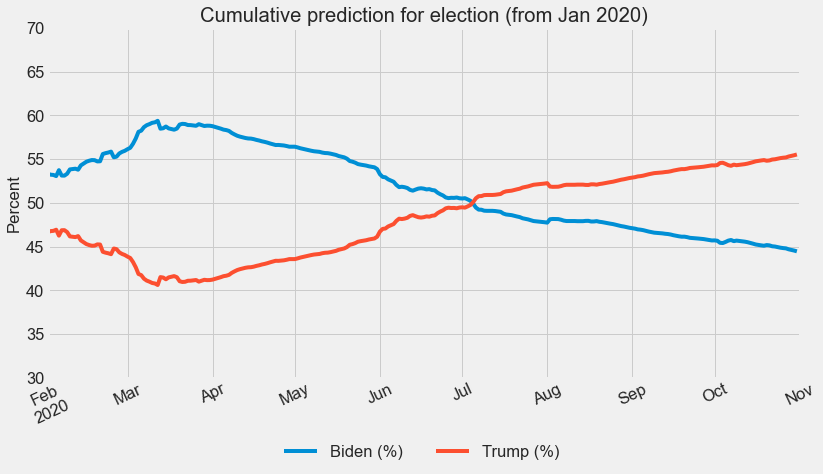

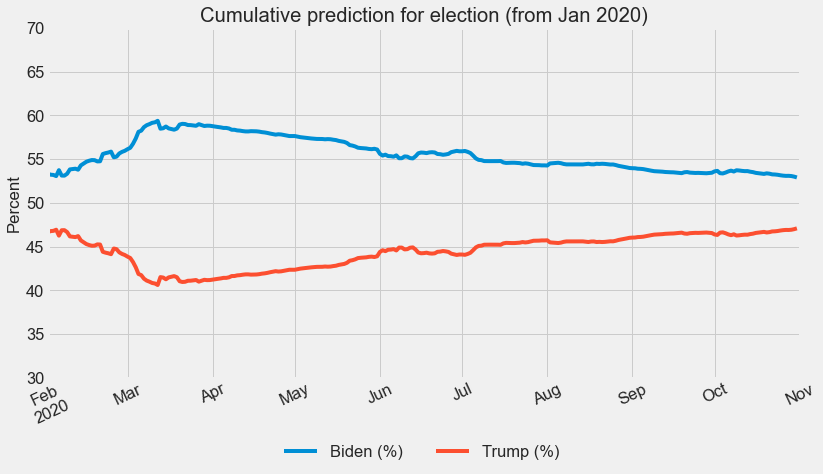

In [26]:
def plot_cum(data, figname):
    print(figname)
    data = data[data.index >= "2020-02-01"]
    data.index = pd.to_datetime(data.index)
    data = data.copy()
    plt.figure(figsize=(12, 6))
    # data = data.rename(columns={'0':"Biden", '1': "Trump", "2": "Undecided"})
    # data["Biden (%)"] = data["Biden"] / (data["Biden"] + data["Trump"] + data["Undecided"]) * 100
    # data["Trump (%)"] = data["Trump"] / (data["Biden"] + data["Trump"] + data["Undecided"]) * 100
    # data["Undecided (%)"] = data["Undecided"] / (data["Biden"] + data["Trump"] + data["Undecided"]) * 100
    # data["Biden (%)"].plot()
    # data["Trump (%)"].plot()
    # data["Undecided (%)"].plot()

    data["Biden (%)"] = data["Biden"] / (data["Biden"] + data["Trump"]) * 100
    data["Trump (%)"] = data["Trump"] / (data["Biden"] + data["Trump"]) * 100
    data["Biden (%)"].plot()
    data["Trump (%)"].plot()
    plt.xlabel("")
    # plt.ylim(0, 70)
    xticks = pd.date_range("2020-02-01", "2020-11-01", freq='MS')
    # print(xticks)
    plt.xticks([x.strftime('%Y-%m-%d') for x in xticks], rotation=25)
    plt.ylabel("Percent")
    plt.ylim(30, 70)

    plt.legend(loc=1, bbox_to_anchor=(0.7, -0.15), ncol=3, frameon=False)
    plt.title(f"Cumulative prediction for election (from Jan 2020)")
    plt.savefig(figname, dpi=300, bbox_inches ='tight')
    # plt.show()
    # plt.close()

data = pd.read_csv("data/csv/cumFrom01-from-2020-01-02-to-2020-10-31-v1-0.5.csv").set_index("dt")
plot_cum(data, "fig/results-cumFrom01-v1-0.5.png")

data = pd.read_csv("data/csv/cumFrom01-from-2020-01-02-to-2020-10-31-v2-0.5.csv").set_index("dt")
plot_cum(data, "fig/results-cumFrom01-v2-0.5.png")

data = pd.read_csv("data/csv/cumFrom01-from-2020-01-02-to-2020-10-31-v1-0.66.csv").set_index("dt")
plot_cum(data, "fig/results-cumFrom01-v1-0.66.png")

data = pd.read_csv("data/csv/cumFrom01-from-2020-01-02-to-2020-10-31-v2-0.66.csv").set_index("dt")
plot_cum(data, "fig/results-cumFrom01-v1-0.66.png")

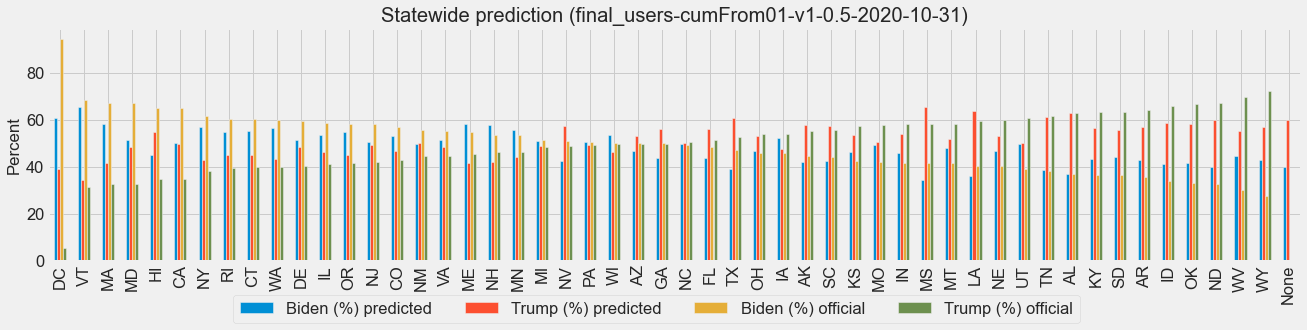

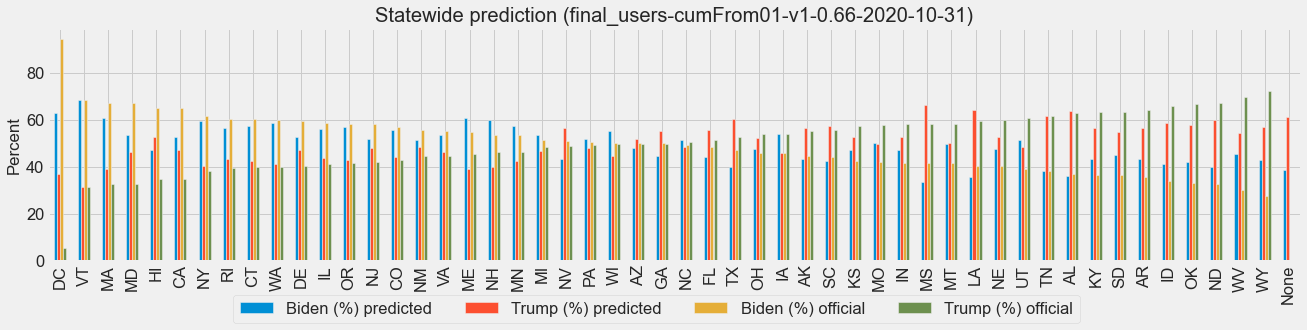

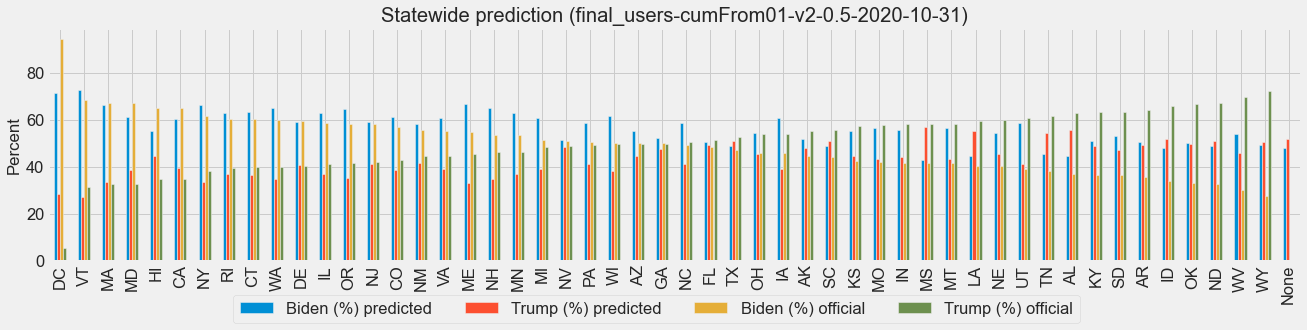

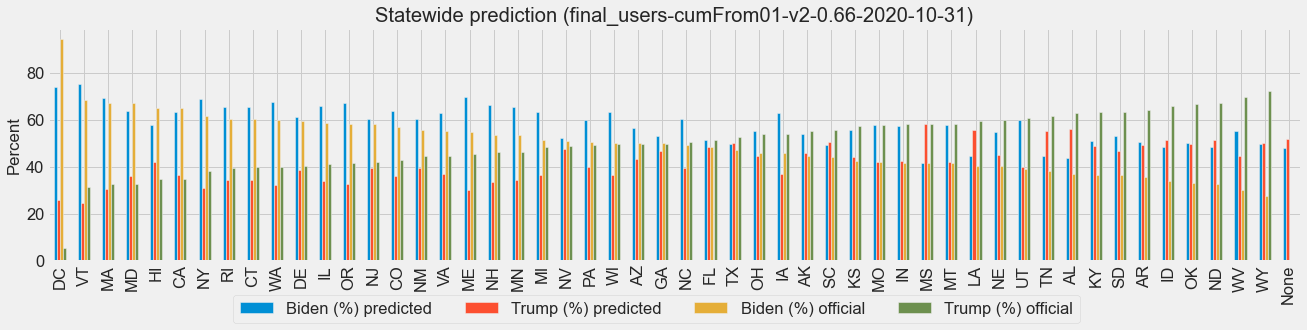

In [24]:
# 每州结果

from pathlib import Path

official_votes = pd.read_csv('data/2020-votes.csv').set_index("state")
official_votes = official_votes.rename(columns={"Biden": "Biden (%) official", "Trump": "Trump (%) official"})
# display(official_votes)

US_states = ['NY', 'DC', 'IN', 'AR', 'WY', 'ME', 'TX', 'NH', 'CO', 'CA', 'IL',
             'WA', 'VA', 'FL', 'MA', 'OR', 'AZ', 'MT', 'MN', 'NE', 'TN', 'OH',
             'NJ', 'NV', 'KY', 'UT', 'NC', 'SC', 'PA', 'NM', 'KS', 'GA', 'MI',
             'WI', 'AK', 'MS', 'MD', 'LA', 'HI', 'MO', 'AL', 'CT', 'OK', 'IA',
             'WV', 'RI', 'SD', 'VT', 'ND', 'ID', 'DE', 'None']

def plot_states_bar(csv_file_name):
    file_stem = Path(csv_file_name).stem

    data_states = pd.read_csv(csv_file_name)
    # display(data_states)
    data_states = data_states.rename(columns={"Unnamed: 0": "state"})
    data_states = data_states.set_index("state")
    
    # 二分类
    data_states['Biden (%) predicted'] = data_states['Biden (%)'] / (1 - data_states['Undecided (%)'])
    data_states['Trump (%) predicted'] = data_states['Trump (%)'] / (1 - data_states['Undecided (%)'])

    data_states = data_states.join(official_votes)
    # display(data_states)

    data_states = data_states[['Biden (%) predicted', 'Trump (%) predicted', 'Biden (%) official', 'Trump (%) official']]
    data_states = data_states * 100
    data_states = data_states.round(2)
    data_states = data_states.sort_values("Trump (%) official")

    data_states.plot(kind="bar", figsize=(20, 4))
    plt.ylabel("Percent"); plt.xlabel("")
    plt.legend(loc=4, bbox_to_anchor=(0.83, -.3), ncol=4)
    plt.title(f"Statewide prediction ({file_stem})")
    plt.savefig(f"fig/states_{file_stem}.png", dpi=300, bbox_inches ='tight')

plot_states_bar("data/states_result/final_users-cumFrom01-v1-0.5-2020-10-31.csv")
plot_states_bar("data/states_result/final_users-cumFrom01-v1-0.66-2020-10-31.csv")
plot_states_bar("data/states_result/final_users-cumFrom01-v2-0.5-2020-10-31.csv")
plot_states_bar("data/states_result/final_users-cumFrom01-v2-0.66-2020-10-31.csv")

# for state in tqdm(US_states):
#     data = data_states[data_states["state"]==state].set_index("dt")
#     data.index = pd.to_datetime(data.index)
#     data = data[["Joe Biden", "Donald Trump"]]
#     data.plot(figsize=(12, 6))
#     plt.xlabel(""); plt.ylabel("Number of supporters")
#     # plt.xticks(rotation=30)
#     # plt.legend(loc=4, bbox_to_anchor=(1.1, -0.05, 0.25, 0.25))
#     plt.legend(loc=4, bbox_to_anchor=(0.7, -0.2), ncol=2, frameon=False)
#     plt.title(f"Instantaneous prediction (14-day) for election in {state}")
#     plt.savefig(f"fig/14days-number-{state}.png", dpi=300, bbox_inches ='tight')
#     # plt.show()
#     plt.close()

#     data["Joe Biden %"] = data["Joe Biden"] / (data["Joe Biden"] + data["Donald Trump"]) * 100
#     data["Donald Trump %"] = data["Donald Trump"] / (data["Joe Biden"] + data["Donald Trump"]) * 100
#     data = data[["Joe Biden %", "Donald Trump %"]]
#     data.plot(figsize=(12, 6))
#     plt.xlabel(""); plt.ylabel("Percent")
#     plt.ylim(20, 80)
#     # plt.xticks(rotation=30)
#     # plt.legend(loc=4, bbox_to_anchor=(1.1, -0.05, 0.25, 0.25))
#     plt.legend(loc=4, bbox_to_anchor=(0.7, -0.2), ncol=2, frameon=False)
#     plt.title(f"Instantaneous prediction (14-day) for election in {state}")
#     plt.savefig(f"fig/14days-percent-{state}.png", dpi=300, bbox_inches ='tight')
#     # plt.show()
#     plt.close()
    # break

In [6]:
# 每州结果

US_states = ['NY', 'DC', 'IN', 'AR', 'WY', 'ME', 'TX', 'NH', 'CO', 'CA', 'IL',
             'WA', 'VA', 'FL', 'MA', 'OR', 'AZ', 'MT', 'MN', 'NE', 'TN', 'OH',
             'NJ', 'NV', 'KY', 'UT', 'NC', 'SC', 'PA', 'NM', 'KS', 'GA', 'MI',
             'WI', 'AK', 'MS', 'MD', 'LA', 'HI', 'MO', 'AL', 'CT', 'OK', 'IA',
             'WV', 'RI', 'SD', 'VT', 'ND', 'ID', 'DE', 'USA']

data_states = pd.read_csv("data/csv/states-cumFrom01-onlyTB-from-2020-01-02-to-2020-10-20.csv")
# data_states = data_states[(data_states["dt"] >= "2020-01-10") & (data_states["dt"] <= "2020-07-01")]
data_states = data_states.rename(columns={"0":"Joe Biden", "1": "Donald Trump", "2": "Undecided"})
# print(data_states)

for state in tqdm(US_states):
    data = data_states[data_states["state"]==state].set_index("dt")
    data.index = pd.to_datetime(data.index)
    data = data[["Joe Biden", "Donald Trump"]]
    data.plot(figsize=(12, 6))
    plt.xlabel(""); plt.ylabel("Number of supporters")
    # plt.xticks(rotation=30)
    # plt.legend(loc=4, bbox_to_anchor=(1.1, -0.05, 0.25, 0.25))
    plt.legend(loc=4, bbox_to_anchor=(0.7, -0.2), ncol=2, frameon=False)
    plt.title(f"Cumulative prediction for election in {state}")
    # plt.savefig(f"fig/cumFrom01-number-{state}.png", dpi=300, bbox_inches ='tight')
    # plt.show()
    plt.close()

    data["Joe Biden %"] = data["Joe Biden"] / (data["Joe Biden"] + data["Donald Trump"]) * 100
    data["Donald Trump %"] = data["Donald Trump"] / (data["Joe Biden"] + data["Donald Trump"]) * 100
    data = data[["Joe Biden %", "Donald Trump %"]]
    data.plot(figsize=(12, 6))
    plt.xlabel(""); plt.ylabel("Percent")
    plt.ylim(20, 80)
    # plt.xticks(rotation=30)
    # plt.legend(loc=4, bbox_to_anchor=(1.1, -0.05, 0.25, 0.25))
    plt.legend(loc=4, bbox_to_anchor=(0.7, -0.2), ncol=2, frameon=False)
    if state == "USA":
        plt.title(f"Cumulative prediction for election")
    else:
        plt.title(f"Cumulative prediction for election in {state}")
    plt.savefig(f"fig/cumFrom01-percent-{state}.png", dpi=300, bbox_inches ='tight')
    # plt.show()
    plt.close()
    # break

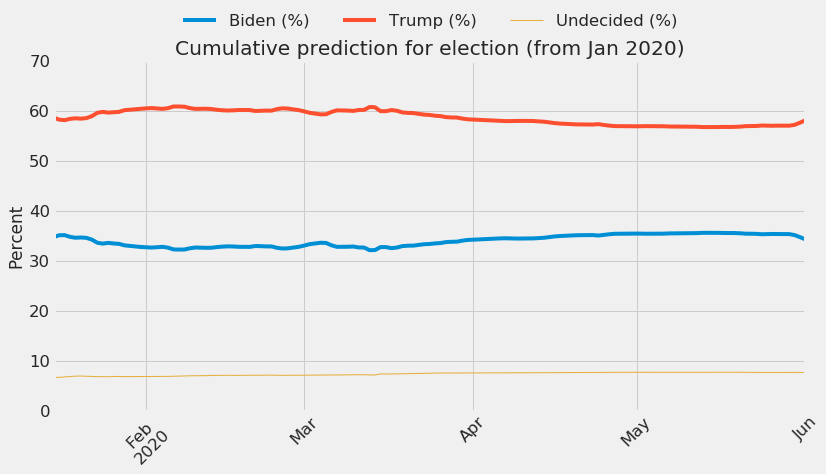

,Biden,Trump,Undecided,Biden (%),Trump (%),Undecided (%)
dt,,,,,,
2020-01-15,547631,924600,104653,34.728680,58.634624,6.636696
2020-01-16,583896,968817,111086,35.094143,58.229209,6.676648
2020-01-17,625491,1035031,120439,35.120982,58.116433,6.762585
2020-01-18,665048,1116574,130902,34.773315,58.382222,6.844463
2020-01-19,686342,1160235,137166,34.598333,58.487163,6.914505
...,...,...,...,...,...,...
2020-05-28,3309099,5340135,716559,35.331755,57.017436,7.650810
2020-05-29,3325493,5366805,721307,35.326456,57.011156,7.662389
2020-05-30,3364457,5474753,735889,35.137569,57.176986,7.685445


In [5]:
data = pd.read_csv("data/csv/results-cumFrom01-from-2020-01-02-to-2020-06-01.csv", index_col="dt")
data = data.rename(columns={'Joe Biden':"Biden", 'Donald Trump': "Trump", 'Undecided': "Undecided"})
data.index = pd.to_datetime(data.index)

data = data[(data.index >= "2020-01-15") & (data.index <= "2020-07-01")]
data["Biden (%)"] = data["Biden"] / (data["Biden"] + data["Trump"] + data["Undecided"]) * 100
data["Trump (%)"] = data["Trump"] / (data["Biden"] + data["Trump"] + data["Undecided"]) * 100
data["Undecided (%)"] = data["Undecided"] / (data["Biden"] + data["Trump"] + data["Undecided"]) * 100

plt.figure(figsize=(12, 6))
data["Biden (%)"].plot()
data["Trump (%)"].plot()
data["Undecided (%)"].plot(lw=1)
plt.legend(loc=4, bbox_to_anchor=(0.85, 1.05), ncol=3, frameon=False)
plt.xlabel("")
plt.ylim(0, 70)
plt.xticks(rotation=45)
plt.ylabel("Percent")
plt.title(f"Cumulative prediction for election (from Jan 2020)")
plt.savefig("fig/cumFrom01-from-2020-01-02-to-2020-07-19-3.png", dpi=300, bbox_inches ='tight')
plt.show()
data

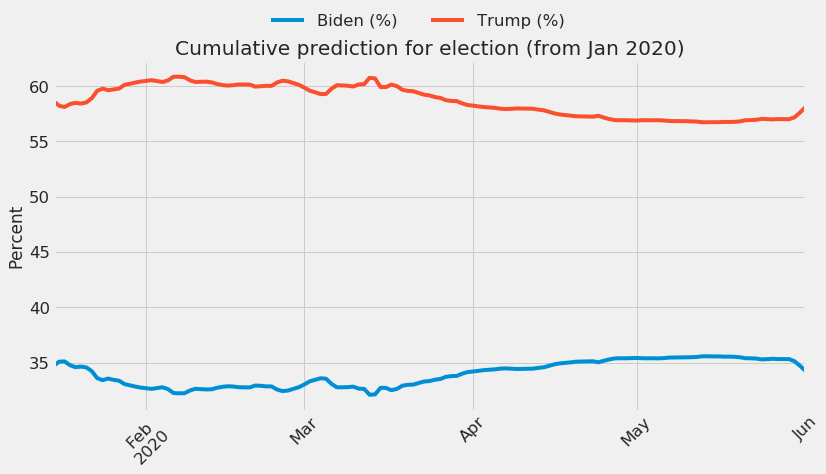

,Biden,Trump,Undecided,Biden (%),Trump (%)
dt,,,,,
2020-01-15,547631,924600,104653,34.728680,58.634624
2020-01-16,583896,968817,111086,35.094143,58.229209
2020-01-17,625491,1035031,120439,35.120982,58.116433
2020-01-18,665048,1116574,130902,34.773315,58.382222
2020-01-19,686342,1160235,137166,34.598333,58.487163
...,...,...,...,...,...
2020-05-28,3309099,5340135,716559,35.331755,57.017436
2020-05-29,3325493,5366805,721307,35.326456,57.011156
2020-05-30,3364457,5474753,735889,35.137569,57.176986


In [7]:
data = pd.read_csv("data/csv/results-cumFrom01-from-2020-01-02-to-2020-06-01.csv", index_col="dt")
data = data.rename(columns={'Joe Biden':"Biden", 'Donald Trump': "Trump", 'Undecided': "Undecided"})
data.index = pd.to_datetime(data.index)

data = data[(data.index >= "2020-01-15") & (data.index <= "2020-07-01")]
data["Biden (%)"] = data["Biden"] / (data["Biden"] + data["Trump"] + data["Undecided"]) * 100
data["Trump (%)"] = data["Trump"] / (data["Biden"] + data["Trump"] + data["Undecided"]) * 100
# data["Undecided (%)"] = data["Undecided"] / (data["Biden"] + data["Trump"] + data["Undecided"]) * 100

plt.figure(figsize=(12, 6))
data["Biden (%)"].plot()
data["Trump (%)"].plot()
# data["Undecided (%)"].plot(lw=1)
plt.legend(loc=4, bbox_to_anchor=(0.7, 1.05), ncol=3, frameon=False)
plt.xlabel("")
# plt.ylim(35, 55)
plt.xticks(rotation=45)
plt.ylabel("Percent")
plt.title(f"Cumulative prediction for election (from Jan 2020)")
plt.savefig("fig/cumFrom01-from-2020-01-02-to-2020-07-19-2.png", dpi=300, bbox_inches ='tight')
plt.show()
data

In [8]:
data_states = pd.read_csv("data/csv/results-states-culFrom01-from-2020-01-15-to-2020-06-01.csv")
data_states = data_states[(data_states["dt"] >= "2020-01-10") & (data_states["dt"] <= "2020-07-01")]
# print(data_states)

state="USA"
data = data_states[data_states["state"]==state].set_index("dt")
data.index = pd.to_datetime(data.index)

data = data.rename(columns={'0':"Joe Biden", '1': "Donald Trump", '2': "Undecided"})
# # print(data_state, state)
data = data[["Joe Biden", "Donald Trump", "Undecided"]]
data["Joe Biden %"] = data["Joe Biden"] / (data["Joe Biden"] + data["Donald Trump"] + data["Undecided"]) * 100
data["Donald Trump %"] = data["Donald Trump"] / (data["Joe Biden"] + data["Donald Trump"] + data["Undecided"]) * 100
data = data[["Joe Biden %", "Donald Trump %"]]
data = data.round(1)
data.to_csv("data/csv/nation-trump-biden-cum-July.csv")

In [9]:
data_states = pd.read_csv("data/csv/results-states-culFrom01-from-2020-01-15-to-2020-06-01.csv")
data_states = data_states[(data_states["dt"] >= "2020-01-10") & (data_states["dt"] <= "2020-07-01")]
# print(data_states)

data = data_states.set_index("dt")
data.index = pd.to_datetime(data.index)

data = data.rename(columns={'0':"Joe Biden", '1': "Donald Trump", '2': "Undecided"})
# # print(data_state, state)
data = data[["state", "Joe Biden", "Donald Trump", "Undecided"]]
data["Joe Biden %"] = data["Joe Biden"] / (data["Joe Biden"] + data["Donald Trump"] + data["Undecided"]) * 100
data["Donald Trump %"] = data["Donald Trump"] / (data["Joe Biden"] + data["Donald Trump"] + data["Undecided"]) * 100
data["Undecided %"] = data["Undecided"] / (data["Joe Biden"] + data["Donald Trump"] + data["Undecided"]) * 100

data = data[["state", "Joe Biden %", "Donald Trump %", "Undecided %"]]
data = data.round(1)
data.to_csv("data/csv/nation-trump-biden-cum-July-states.csv")

In [68]:
data_states = pd.read_csv("data/csv/results-states-14days-from-2020-01-15-to-2020-07-15.csv")
data_states = data_states[(data_states["dt"] >= "2020-01-10") & (data_states["dt"] <= "2020-07-01")]
# print(data_states)

state="USA"
data = data_states[data_states["state"]==state].set_index("dt")
data.index = pd.to_datetime(data.index)

data = data.rename(columns={'0':"Joe Biden", '1': "Donald Trump", '2': "Undecided"})
# # print(data_state, state)
data = data[["Joe Biden", "Donald Trump", "Undecided"]]
data["Joe Biden %"] = data["Joe Biden"] / (data["Joe Biden"] + data["Donald Trump"] + data["Undecided"]) * 100
data["Donald Trump %"] = data["Donald Trump"] / (data["Joe Biden"] + data["Donald Trump"] + data["Undecided"]) * 100
data = data[["Joe Biden %", "Donald Trump %"]]
data = data.round(1)
data.to_csv("data/csv/nation-trump-biden-int-July.csv")

## 50个洲的结果，时间序列，绝对数量和百分比

In [10]:
US_states = ['NY', 'DC', 'IN', 'AR', 'WY', 'ME', 'TX', 'NH', 'CO', 'CA', 'IL',
             'WA', 'VA', 'FL', 'MA', 'OR', 'AZ', 'MT', 'MN', 'NE', 'TN', 'OH',
             'NJ', 'NV', 'KY', 'UT', 'NC', 'SC', 'PA', 'NM', 'KS', 'GA', 'MI',
             'WI', 'AK', 'MS', 'MD', 'LA', 'HI', 'MO', 'AL', 'CT', 'OK', 'IA',
             'WV', 'RI', 'SD', 'VT', 'ND', 'ID', 'DE', 'USA']

data_states = pd.read_csv("data/csv/results-states-culFrom01-from-2020-01-15-to-2020-06-01.csv")
data_states = data_states[data_states["dt"] >= "2020-01-10"]
# print(data_states)

for state in tqdm(US_states):
    data = data_states[data_states["state"]==state].set_index("dt")
    data.index = pd.to_datetime(data.index)

    data = data.rename(columns={'0':"Joe Biden", '1': "Donald Trump"})
    # # print(data_state, state)
    data = data[["Joe Biden", "Donald Trump"]]
    data.plot(figsize=(12, 6))
    plt.xlabel(""); plt.ylabel("Number of supporters")
    # plt.xticks(rotation=30)
    # plt.legend(loc=4, bbox_to_anchor=(1.1, -0.05, 0.25, 0.25))
    plt.legend(loc=4, bbox_to_anchor=(0.7, -0.2), ncol=2, frameon=False)
    plt.title(f"Cumulative supporters for election in {state}")
    plt.savefig(f"fig/number-{state}-from-2020-01-to-2020-07.png", dpi=300, bbox_inches ='tight')
    # plt.show()
    plt.close()

    data["Joe Biden %"] = data["Joe Biden"] / (data["Joe Biden"] + data["Donald Trump"]) * 100
    data["Donald Trump %"] = data["Donald Trump"] / (data["Joe Biden"] + data["Donald Trump"]) * 100
    data = data[["Joe Biden %", "Donald Trump %"]]
    data.plot(figsize=(12, 6))
    plt.xlabel(""); plt.ylabel("Percent")
    plt.ylim(20, 80)
    # plt.xticks(rotation=30)
    # plt.legend(loc=4, bbox_to_anchor=(1.1, -0.05, 0.25, 0.25))
    plt.legend(loc=4, bbox_to_anchor=(0.7, -0.2), ncol=2, frameon=False)
    plt.title(f"Cumulative prediction for election in {state}")
    plt.savefig(f"fig/percent-{state}-from-2020-01-to-2020-07.png", dpi=300, bbox_inches ='tight')
    # plt.show()
    plt.close()
    # break

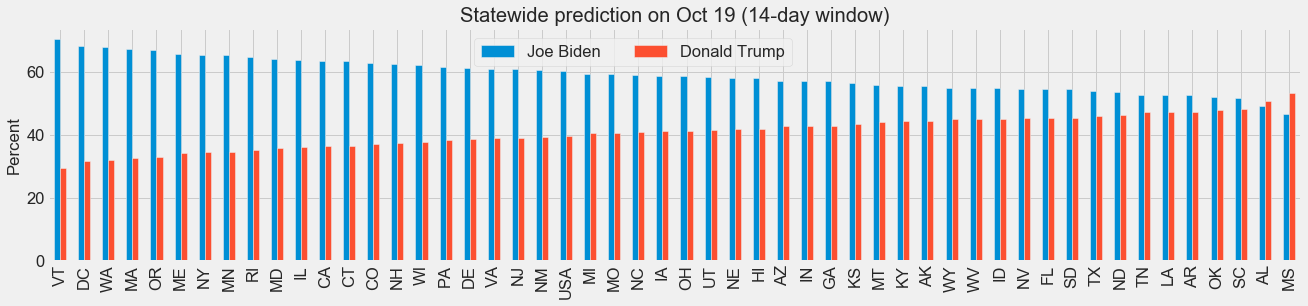

In [13]:
# 最后一日的柱状图

data_states = pd.read_csv("data/csv/states-14days-onlyTB-from-2020-01-15-to-2020-10-20.csv").set_index("state")
# print(data_states)
data = data_states[data_states["dt"] == "2020-10-31"]
data = data[['0', '1', '2']]
# data['Biden'] = data['0'] / (data['0'] + data['1'] + data['2']) * 100
# data['Trump'] = data['1'] / (data['0'] + data['1'] + data['2']) * 100
# data['Undecided'] = data['2'] / (data['0'] + data['1'] + data['2']) * 100
data['Joe Biden'] = data['0'] / (data['0'] + data['1']) * 100
data['Donald Trump'] = data['1'] / (data['0'] + data['1']) * 100

# data = data[['Biden', 'Trump', 'Undecided']]
data = data[['Biden (%)', 'Trump (%)']]
data = data.round(1)
data = data.sort_values("Donald Trump")
# print(data)
data.plot(kind="bar", figsize=(20, 4))
plt.ylabel("Percent"); plt.xlabel("")
plt.legend(loc=4, bbox_to_anchor=(0.6, 0.8), ncol=2)
plt.title("Statewide prediction on Oct 19 (14-day window)")
# plt.legend(loc=1, ncol=2)
plt.savefig("fig/states-14days-onlyTB-10-19.png", dpi=300, bbox_inches ='tight')
# data

In [ ]:
data = data[['Biden (%)', 'Trump (%)']]
data = data.round(1)
data = data.sort_values("Donald Trump")
# print(data)
data.plot(kind="bar", figsize=(20, 4))
plt.ylabel("Percent"); plt.xlabel("")
plt.legend(loc=4, bbox_to_anchor=(0.6, 0.8), ncol=2)
plt.title("Statewide prediction on Oct 19 (14-day window)")
# plt.legend(loc=1, ncol=2)
# plt.savefig("fig/states-14days-onlyTB-10-19.png", dpi=300, bbox_inches ='tight')

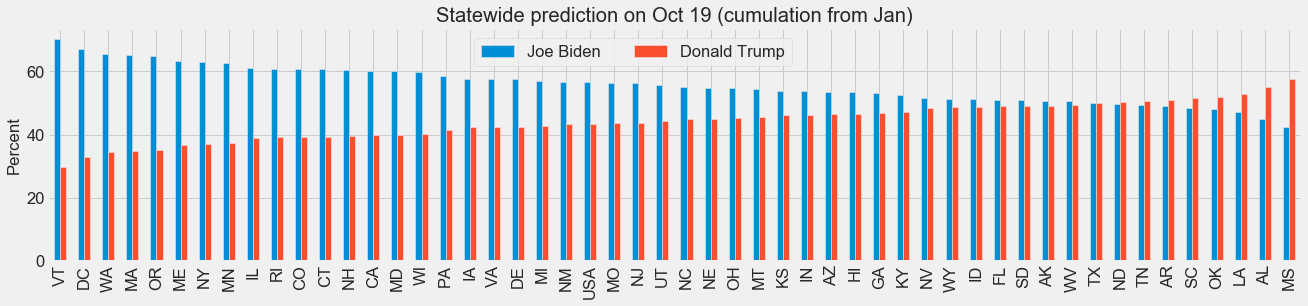

In [14]:
data_states = pd.read_csv("data/csv/states-cumFrom01-onlyTB-from-2020-01-02-to-2020-10-20.csv").set_index("state")
# print(data_states)
data = data_states[data_states["dt"] == "2020-10-19"]
data = data[['0', '1', '2']]
# data['Biden'] = data['0'] / (data['0'] + data['1'] + data['2']) * 100
# data['Trump'] = data['1'] / (data['0'] + data['1'] + data['2']) * 100
# data['Undecided'] = data['2'] / (data['0'] + data['1'] + data['2']) * 100
data['Joe Biden'] = data['0'] / (data['0'] + data['1']) * 100
data['Donald Trump'] = data['1'] / (data['0'] + data['1']) * 100

# data = data[['Biden', 'Trump', 'Undecided']]
data = data[['Joe Biden', 'Donald Trump']]
data = data.round(1)
data = data.sort_values("Donald Trump")
# print(data)
data.plot(kind="bar", figsize=(20, 4))
plt.ylabel("Percent"); plt.xlabel("")
plt.legend(loc=4, bbox_to_anchor=(0.6, 0.8), ncol=2)
# plt.legend(loc=1, ncol=2)
plt.title("Statewide prediction on Oct 19 (cumulation from Jan)")
plt.savefig("fig/states-cumFrom01-onlyTB-10-19.png", dpi=300, bbox_inches ='tight')
# data

In [50]:
import us

name_to_abbr = {s.name: s.abbr for s in us.states.STATES}
len(name_to_abbr)
name_to_abbr

us_electoral_votes = {}
for line in open("data/US_Electoral_Votes.txt"):
    w = line.strip().split()
    votes = int(w[0])
    states = " ".join(w[1:]).split(",")
    for _s in states:
        if _s == "District of Columbia":
            us_electoral_votes['DC'] = votes
        else:
            us_electoral_votes[name_to_abbr[_s]] = votes
            
len(us_electoral_votes)
Trump_votes = 0; Biden_votes = 0

for _s, row in data.iterrows():
    if _s == "USA":
        continue
    if row.Biden > row.Trump:
        Biden_votes += us_electoral_votes[_s]
    else:
        Trump_votes += us_electoral_votes[_s]
        
Biden_votes, Trump_votes

FileNotFoundError: [Errno 2] No such file or directory: 'data/US_Electoral_Votes.txt'

In [59]:
name_to_abbr = {s.abbr: s.name for s in us.states.STATES}
name_to_abbr["DC"] = "District of Columbia"

In [65]:
for state, row in data.iterrows():
    if state == "USA":
        continue
    if row["Trump"] > row["Biden"]:
        bingo = 1
    else:
        bingo = 0
    print(f'["{name_to_abbr[state]}", {row["Trump"]}, {row["Biden"]}, {row["Undecided"]}, 100, {bingo}],')

["Vermont", 29.9, 61.4, 8.8, 100, 0],
["Oregon", 36.8, 53.9, 9.3, 100, 0],
["Washington", 37.4, 53.0, 9.6, 100, 0],
["District of Columbia", 37.8, 52.9, 9.2, 100, 0],
["Massachusetts", 38.0, 52.7, 9.3, 100, 0],
["New York", 39.5, 50.9, 9.7, 100, 0],
["Minnesota", 40.2, 50.6, 9.2, 100, 0],
["California", 40.2, 49.6, 10.1, 100, 0],
["Illinois", 40.3, 49.8, 9.9, 100, 0],
["Maine", 40.5, 51.1, 8.4, 100, 0],
["Rhode Island", 40.7, 49.7, 9.6, 100, 0],
["New Hampshire", 41.3, 50.6, 8.1, 100, 0],
["Colorado", 41.5, 49.6, 8.9, 100, 0],
["Connecticut", 41.6, 49.1, 9.2, 100, 0],
["Maryland", 42.1, 47.9, 10.1, 100, 0],
["Michigan", 42.8, 47.8, 9.4, 100, 0],
["Wisconsin", 42.9, 48.3, 8.9, 100, 0],
["Iowa", 42.9, 48.0, 9.1, 100, 0],
["Pennsylvania", 43.8, 47.2, 9.0, 100, 0],
["New Mexico", 44.5, 46.6, 8.9, 100, 0],
["Virginia", 45.0, 45.9, 9.1, 100, 0],
["Missouri", 45.2, 45.8, 9.0, 100, 0],
["Utah", 45.2, 45.3, 9.6, 100, 0],
["Delaware", 45.4, 46.0, 8.7, 100, 0],
["Hawaii", 45.5, 44.7, 9.7, 100, 1]

<Figure size 864x576 with 0 Axes>

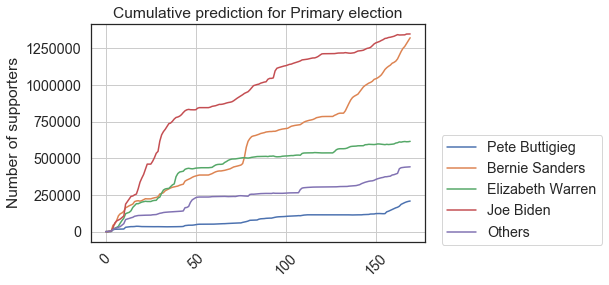

In [22]:
data = pd.read_csv("data/csv/results-culFrom09.csv")
plt.figure(figsize=(12, 8))
data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.savefig("fig/results-culFrom09.csv.png", dpi=300, bbox_inches ='tight')
plt.show()

<Figure size 864x576 with 0 Axes>

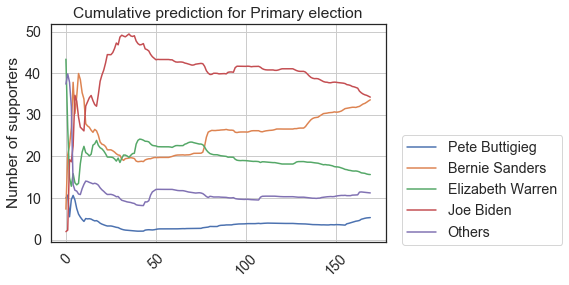

In [23]:
data = pd.read_csv("data/csv/results-culFrom09-percent.csv")
plt.figure(figsize=(12, 8))
data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.savefig("fig/results-culFrom09-percent.csv.png", dpi=300, bbox_inches ='tight')
plt.show()

<Figure size 864x576 with 0 Axes>

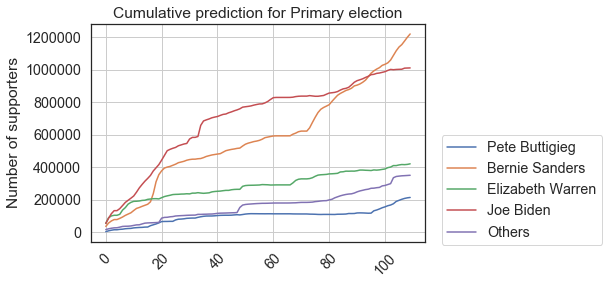

<Figure size 864x576 with 0 Axes>

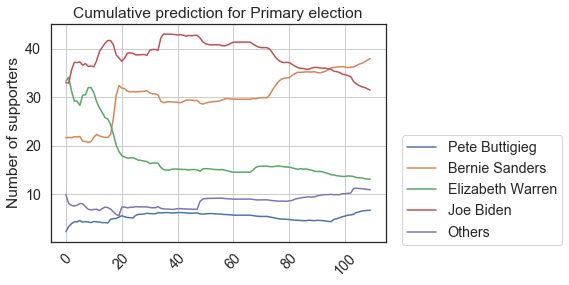

In [24]:
data = pd.read_csv("data/csv/results-culFrom11.csv")
plt.figure(figsize=(12, 8))
data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.savefig("fig/results-culFrom11.csv.png", dpi=300, bbox_inches ='tight')
plt.show()

data = pd.read_csv("data/csv/results-culFrom11-percent.csv")
plt.figure(figsize=(12, 8))
data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.savefig("fig/results-culFrom11-percent.csv.png", dpi=300, bbox_inches ='tight')
plt.show()

<Figure size 864x576 with 0 Axes>

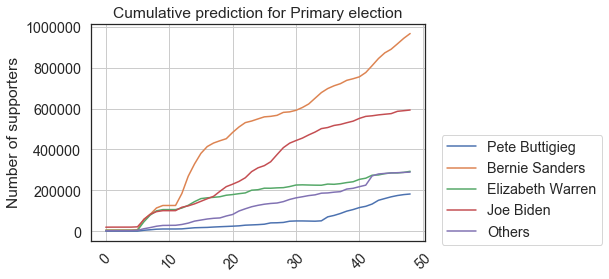

<Figure size 864x576 with 0 Axes>

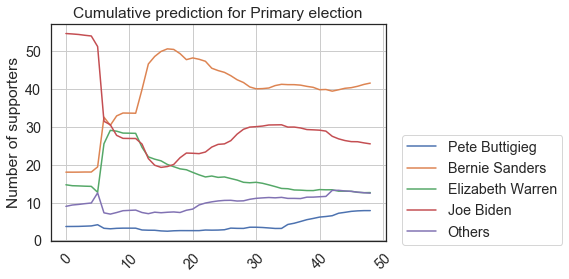

In [25]:
data = pd.read_csv("data/csv/results-culFrom01.csv")
plt.figure(figsize=(12, 8))
data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.savefig("fig/results-culFrom01.csv.png", dpi=300, bbox_inches ='tight')
plt.show()

data = pd.read_csv("data/csv/results-culFrom01-percent.csv")
plt.figure(figsize=(12, 8))
data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.savefig("fig/results-culFrom01-percent.csv.png", dpi=300, bbox_inches ='tight')
plt.show()

<Figure size 864x576 with 0 Axes>

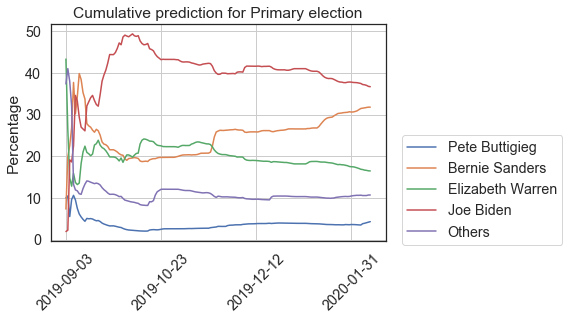

In [6]:
plt.figure(figsize=(12, 8))

data1.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.show()

<Figure size 864x576 with 0 Axes>

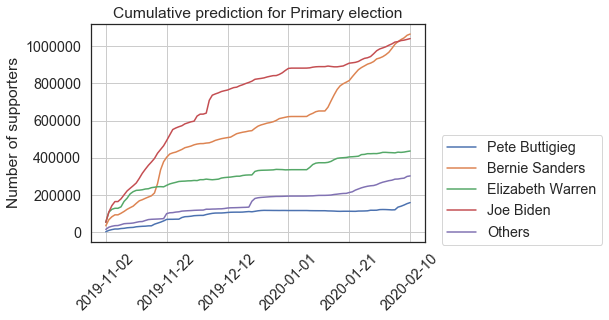

<Figure size 864x576 with 0 Axes>

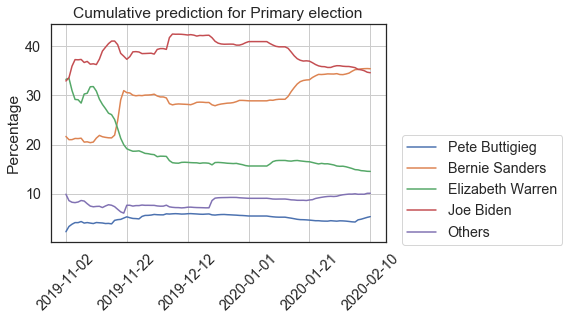

In [8]:
# start from 11

data = pd.read_csv("disk/results-culFrom11.csv").set_index("dt")
data = data.rename(columns={"0": "Pete Buttigieg", 
                            "1": "Bernie Sanders", 
                            "2": "Elizabeth Warren", 
                            "3": "Joe Biden", 
                            "4": "Others",})

plt.figure(figsize=(12, 8))

data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.show()

data1 = data.div(data.sum(axis=1), axis=0) * 100
# data1

plt.figure(figsize=(12, 8))

data1.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.show()

<Figure size 864x576 with 0 Axes>

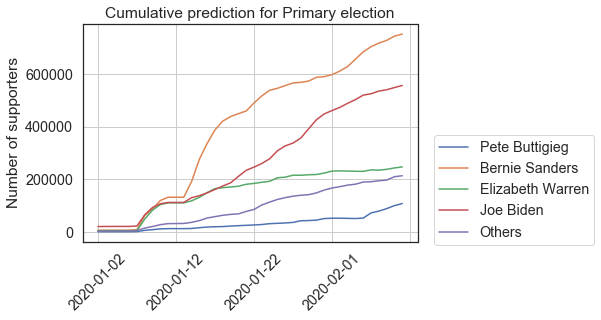

<Figure size 864x576 with 0 Axes>

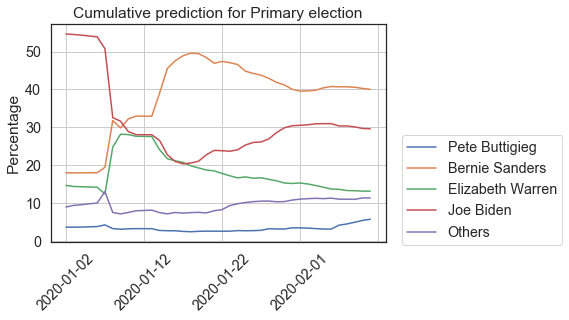

In [9]:
# start from 11

data = pd.read_csv("disk/results-culFrom01.csv").set_index("dt")
data = data.rename(columns={"0": "Pete Buttigieg", 
                            "1": "Bernie Sanders", 
                            "2": "Elizabeth Warren", 
                            "3": "Joe Biden", 
                            "4": "Others",})

plt.figure(figsize=(12, 8))

data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.show()

data1 = data.div(data.sum(axis=1), axis=0) * 100
# data1

plt.figure(figsize=(12, 8))

data1.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.show()

In [41]:
data = pd.read_csv("disk/results-14days.csv").set_index("dt")
data = data.rename(columns={"0": "Pete Buttigieg", 
"1": "Bernie Sanders", 
"2": "Elizabeth Warren", 
"3": "Joe Biden", 
"4": "Others",})
data

,Pete Buttigieg,Bernie Sanders,Elizabeth Warren,Joe Biden,Others
dt,,,,,
2019-09-17,34208,182280,142307,240117,94305
2019-09-18,34153,187756,165139,243240,97648
2019-09-19,34860,204907,178022,251008,104739
2019-09-20,36482,208871,190547,256282,106606
2019-09-21,36165,210296,190231,292608,109327
...,...,...,...,...,...
2020-02-06,68792,472843,136388,452978,166932
2020-02-07,77382,465275,130930,459734,159130
2020-02-08,87602,453536,131178,455708,154187


<Figure size 2304x576 with 0 Axes>

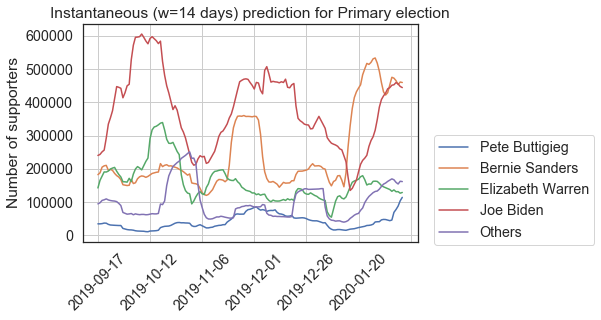

In [42]:
plt.figure(figsize=(32, 8))
data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Instantaneous (w=14 days) prediction for Primary election")
plt.show()

<Figure size 2304x576 with 0 Axes>

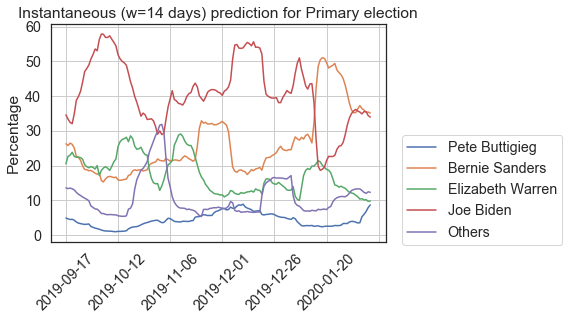

In [43]:
data1 = data.div(data.sum(axis=1), axis=0) * 100
plt.figure(figsize=(32, 8))
data1.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Instantaneous (w=14 days) prediction for Primary election")
plt.show()

(                              name                       loc state  \
 uid                                                                  
 742453163098296320    EmmaVigeland              new york, ny    NY   
 2292116678           affluencekana              new york, ny    NY   
 806537608159514624     BethPapaleo         nolita, manhattan    NY   
 2205848251             DMAMA232323                 new york     NY   
 38378898                 sabrina68             new york, usa    NY   
 ...                            ...                       ...   ...   
 15858526                    DeeNYC               harlem, nyc    NY   
 914331867544997888       Mellighny                  new york    NY   
 390141640           EfficientChris      saratoga springs, ny    NY   
 15374228                   dbxny81                 bronx, ny    NY   
 878803992637321216  drtandthewomen  new york city, new york     NY   
 
                                   county  
 uid                           

In [24]:
# data.to_excel("data/Instantaneous (k=10) and cumulative prediction_p=0.6_norm.xlsx")
data = pd.read_excel("data/Instantaneous (k=10) and cumulative prediction_p=0.66.xlsx").set_index("Unnamed: 0")
data.index = pd.to_datetime(data.index)
data = data[1:]

In [18]:
d = data[data.index == "2019-08-11"]

In [78]:
data["Undecided"] = data["Undecided - FF"] + data["Undecided - MP"] + data["Undecided - Undecided"]
data["FF"] = data["Ultra loyal FF"] + data["loyal FF - FF"] + data["loyal FF - MP"] + data["loyal FF - Undecided"]
data["MP"] = data["Ultra loyal MP"] + data["loyal MP - FF"] + data["loyal MP - MP"] + data["loyal MP - Undecided"]

In [135]:
# data.to_excel("data/Instantaneous (k=10) and cumulative prediction_p=0.6_norm.xlsx")
data = pd.read_excel("data/Instantaneous (k=10) and cumulative prediction_p=0.6_norm.xlsx")

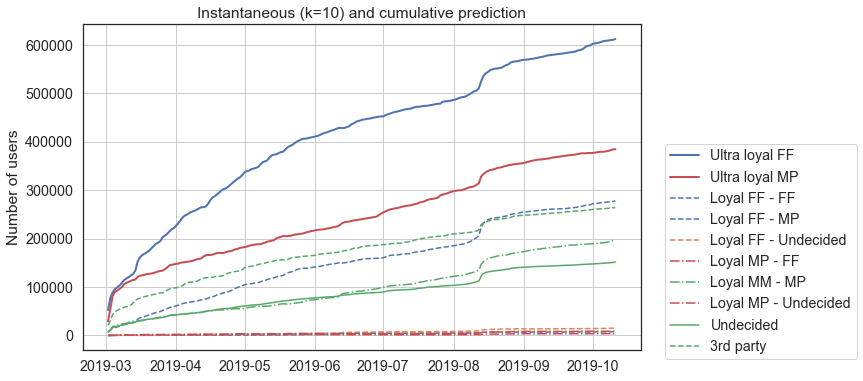

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(data["Ultra loyal FF"], label="Ultra loyal FF", lw=2, c="b")
plt.plot(data["Ultra loyal MP"], label="Ultra loyal MP", lw=2, c="r")

plt.plot(data["loyal FF - FF"], "--", label="Loyal FF - FF", c="b")
plt.plot(data["loyal FF - MP"], "--", label="Loyal FF - MP")
plt.plot(data["loyal FF - Undecided"], "--", label="Loyal FF - Undecided")

plt.plot(data["loyal MP - FF"], "-.", label="Loyal MP - FF", c="r")
plt.plot(data["loyal MP - MP"], "-.", label="Loyal MM - MP")
plt.plot(data["loyal MP - Undecided"], "-.", label="Loyal MP - Undecided")

plt.plot(data["Undecided"], label="Undecided", c="g")
plt.plot(data["Unclassified"], '--', label="3rd party", c="g")

# plt.plot(data["loyal MP - MP"], "-.")
# plt.plot(data["loyal MP - Undecided"], "-.")

plt.xlabel("")
plt.grid()
plt.ylabel("Number of users")
plt.legend()
plt.legend(loc=4, bbox_to_anchor=(1.15, -0.05, 0.25, 0.25))
plt.title(f"Instantaneous (k=10) and cumulative prediction")
plt.show()

# chart 1

In [35]:
data.columns

Index(['Ultra loyal FF', 'Ultra loyal MP', 'Unclassified', 'Undecided - FF',
       'Undecided - MP', 'Undecided - Undecided', 'loyal FF - FF',
       'loyal FF - MP', 'loyal FF - Undecided', 'loyal MP - FF',
       'loyal MP - MP', 'loyal MP - Undecided', 'FF', 'MP', 'Undecided'],
      dtype='object')

In [37]:
data0 = data[['Ultra loyal FF', 'Ultra loyal MP', 'Unclassified',
       'loyal FF - FF', 'loyal FF - MP', 'loyal FF - Undecided', 'loyal MP - FF',
       'loyal MP - MP', 'loyal MP - Undecided', 'Undecided']]
data0 = data0.div(data0.sum(axis=1), axis=0) * 100

In [142]:
# data["Undecided"] = data["Undecided - FF"] + data["Undecided - MP"] + data["Undecided - Undecided"]
# data["FF"] = data["Ultra loyal FF"] + data["loyal FF - FF"] + data["loyal FF - MP"] + data["loyal FF - Undecided"]
# data["MP"] = data["Ultra loyal MP"] + data["loyal MP - FF"] + data["loyal MP - MP"] + data["loyal MP - Undecided"]

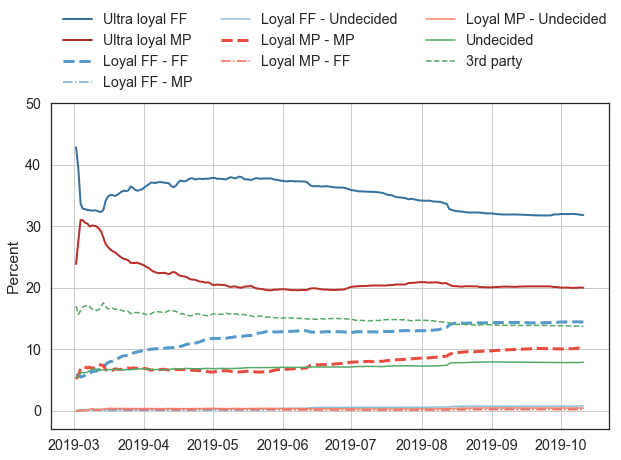

In [39]:
plt.figure(figsize=(10, 6))
FF_c = sns.color_palette("Blues_d", 7)
MP_c = sns.color_palette("Reds_d", 7)
Others_c = sns.color_palette("Greens_d", 7)

plt.plot(data0["Ultra loyal FF"], label="Ultra loyal FF", lw=2, c=FF_c[2])
plt.plot(data0["Ultra loyal MP"], label="Ultra loyal MP", lw=2, c=MP_c[2])

plt.plot(data0["loyal FF - FF"], "--", label="Loyal FF - FF", c=FF_c[4], lw=3)
plt.plot(data0["loyal FF - MP"], "-.", label="Loyal FF - MP", c=FF_c[5])
plt.plot(data0["loyal FF - Undecided"], label="Loyal FF - Undecided", c=FF_c[6])

plt.plot(data0["loyal MP - MP"], "--", label="Loyal MP - MP", c=MP_c[4], lw=3)
plt.plot(data0["loyal MP - FF"], "-.", label="Loyal MP - FF", c=MP_c[5])
plt.plot(data0["loyal MP - Undecided"], label="Loyal MP - Undecided", c=MP_c[6])

plt.plot(data0["Undecided"], label="Undecided", c="g")
plt.plot(data0["Unclassified"], '--', label="3rd party", c="g")

# plt.plot(data["loyal MP - MP"], "-.")
# plt.plot(data["loyal MP - Undecided"], "-.")

plt.grid()
plt.ylim(-3, 50)
plt.xlabel("")
plt.ylabel("Percent")
plt.legend(loc=4, bbox_to_anchor=(1.02, 1), ncol=3, frameon=False)
# plt.title(f"Instantaneous (k=10) and cumulative prediction")
plt.savefig("fig/chart2.pdf", dpi=300, bbox_inches ='tight')
plt.show()

In [43]:
data0 = data[['Ultra loyal FF', 'Ultra loyal MP', 'Unclassified',
              'loyal FF - FF', 'loyal FF - MP', 'loyal FF - Undecided', 'loyal MP - FF',
              'loyal MP - MP', 'loyal MP - Undecided', 'Undecided']]
data0 = data0.div(data0.sum(axis=1), axis=0) * 100

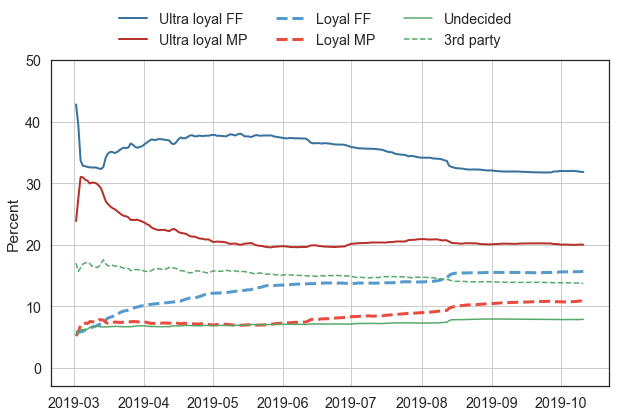

In [44]:
plt.figure(figsize=(10, 6))
FF_c = sns.color_palette("Blues_d", 7)
MP_c = sns.color_palette("Reds_d", 7)
Others_c = sns.color_palette("Greens_d", 7)

plt.plot(data0["Ultra loyal FF"], label="Ultra loyal FF", lw=2, c=FF_c[2])
plt.plot(data0["Ultra loyal MP"], label="Ultra loyal MP", lw=2, c=MP_c[2])

plt.plot(data0["loyal FF - FF"] + data0["loyal FF - MP"] + data0["loyal FF - Undecided"], "--", label="Loyal FF", c=FF_c[4], lw=3)
plt.plot(data0["loyal MP - FF"] + data0["loyal MP - MP"] + data0["loyal MP - Undecided"], "--", label="Loyal MP", c=MP_c[4], lw=3)

plt.plot(data0["Undecided"], label="Undecided", c="g")
plt.plot(data0["Unclassified"], '--', label="3rd party", c="g")

# plt.plot(data["loyal MP - MP"], "-.")
# plt.plot(data["loyal MP - Undecided"], "-.")

plt.grid()
plt.ylim(-3, 50)
plt.xlabel("")
plt.ylabel("Percent")
plt.legend(loc=4, bbox_to_anchor=(0.85, 1), ncol=3, frameon=False)
# plt.title(f"Instantaneous (k=10) and cumulative prediction")
plt.savefig("fig/chart1.pdf", dpi=300, bbox_inches ='tight')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
FF_c = sns.color_palette("Blues_d", 7)
MP_c = sns.color_palette("Reds_d", 7)
Others_c = sns.color_palette("Greens_d", 7)

plt.plot(data["Ultra loyal FF"], label="Ultra loyal FF", lw=2, c=FF_c[2])
plt.plot(data["Ultra loyal MP"], label="Ultra loyal MP", lw=2, c=MP_c[2])

plt.plot(data["loyal FF - FF"], "--", label="Loyal FF - FF", c=FF_c[4], lw=3)
plt.plot(data["loyal FF - MP"], "-.", label="Loyal FF - MP", c=FF_c[5])
plt.plot(data["loyal FF - Undecided"], label="Loyal FF - Undecided", c=FF_c[6])

plt.plot(data["loyal MP - MP"], "--", label="Loyal MP - MP", c=MP_c[4], lw=3)
plt.plot(data["loyal MP - FF"], "-.", label="Loyal MP - FF", c=MP_c[5])
plt.plot(data["loyal MP - Undecided"], label="Loyal MP - Undecided", c=MP_c[6])

plt.plot(data["Undecided"], label="Undecided", c="g")
plt.plot(data["Unclassified"], '--', label="3rd party", c="g")

# plt.plot(data["loyal MP - MP"], "-.")
# plt.plot(data["loyal MP - Undecided"], "-.")

plt.grid()
plt.xlabel("")
plt.ylabel("Percent")
plt.legend(loc=4, bbox_to_anchor=(1.02, 1), ncol=3, frameon=False)
# plt.title(f"Instantaneous (k=10) and cumulative prediction")
plt.savefig("fig/chart1.pdf", dpi=300, bbox_inches ='tight')
plt.show()

# chart 23

Static -New Chart-Classified Tweets per User.

In [45]:
data = json.load(open("disk/cul_from_March_1_v2/2019-10-11-0.66.txt"))

In [46]:
distribution_of_n_of_tweets = [0] * 10

for u, v in tqdm(data.items()):
    if v["I"] > 0:
        continue
    _sum = v["K"] + v["M"]
    if _sum <= 5:
        distribution_of_n_of_tweets[_sum - 1] += 1
    elif _sum <= 10:
        distribution_of_n_of_tweets[-5] += 1
    elif _sum <= 20:
        distribution_of_n_of_tweets[-4] += 1
    elif _sum <= 100:
        distribution_of_n_of_tweets[-3] += 1
    elif _sum <= 1000:
        distribution_of_n_of_tweets[-2] += 1
    else:
        distribution_of_n_of_tweets[-1] += 1

In [47]:
distribution_of_n_of_tweets

[742910, 258455, 138894, 88363, 61769, 153413, 99630, 98279, 18623, 263840]

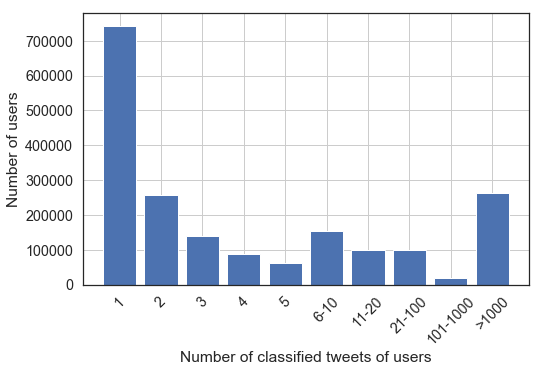

In [49]:
plt.figure(figsize=(8, 5))
plt.bar(range(len(distribution_of_n_of_tweets)), distribution_of_n_of_tweets)
plt.xticks(range(len(distribution_of_n_of_tweets)), ["1", "2", "3", "4", "5", "6-10", "11-20", "21-100", "101-1000", ">1000"], rotation=45)
plt.ylabel("Number of users")
plt.grid()
plt.xlabel("Number of classified tweets of users")
plt.savefig("fig/chart23.pdf", dpi=300, bbox_inches="tight")
plt.show()

# chart 24

Static -New Chart-Classified Tweets per User for Userswith Demographic Information Identified.

In [50]:
users = pd.read_pickle("disk/user_profile/02-07-union-users.pl")

In [51]:
userid_with_demo = {str(u) for u in users.index}

In [52]:
opinion_tweets = json.load(open("disk/cul_from_March_1_v2/2019-10-11-0.66.txt"))
users_opinion = []
for uid, v in tqdm(opinion_tweets.items()):
    if v["I"] > 0:
        continue
    if v["M"] > v["K"]:
        users_opinion.append({"uid": int(uid), "opinion": "MP"})
    elif v["M"] < v["K"]:
        users_opinion.append({"uid": int(uid), "opinion": "FF"})
    else:
        users_opinion.append({"uid": int(uid), "opinion": "Others"})
users_opinion = pd.DataFrame(users_opinion).set_index("uid")

In [53]:
users_v2 = users.join(users_opinion, how="inner")

In [54]:
distribution_of_n_of_tweets = [0] * 10

for u, v in tqdm(opinion_tweets.items()):
    if u not in userid_with_demo:
        continue
    if v["I"] > 0:
        continue
    _sum = v["K"] + v["M"]
    if _sum <= 5:
        distribution_of_n_of_tweets[_sum - 1] += 1
    elif _sum <= 10:
        distribution_of_n_of_tweets[-5] += 1
    elif _sum <= 20:
        distribution_of_n_of_tweets[-4] += 1
    elif _sum <= 100:
        distribution_of_n_of_tweets[-3] += 1
    elif _sum <= 1000:
        distribution_of_n_of_tweets[-2] += 1
    else:
        distribution_of_n_of_tweets[-1] += 1

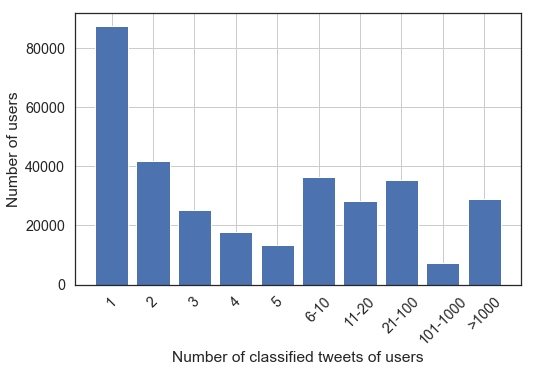

In [55]:
plt.figure(figsize=(8, 5))
plt.bar(range(len(distribution_of_n_of_tweets)), distribution_of_n_of_tweets)
plt.xticks(range(len(distribution_of_n_of_tweets)), ["1", "2", "3", "4", "5", "6-10", "11-20", "21-100", "101-1000", ">1000"], rotation=45)
plt.ylabel("Number of users")
plt.xlabel("Number of classified tweets of users")
plt.grid()
plt.savefig("fig/chart24.pdf", dpi=300, bbox_inches="tight")
plt.show()

# chart 25
25.Static-NewChart -Percent of Loyal Users’ Tweets that are Pro-Macri or Pro-Christina.

Get loyal FF and loyal MP on Oct 10.

In [56]:
rsts = {}
all_dates = [dt.to_date_string() for dt in pendulum.Period(pendulum.Date(2019, 3, 2), pendulum.Date(2019, 10, 11))]

for dt in all_dates:
    rsts[dt] = {
#         "Ultra loyal FF": 0,
#         "Ultra loyal MP": 0,
        "loyal FF - FF": [],
        "loyal FF - MP": [],
        "loyal FF - Undecided": [],
        "loyal MP - FF": [],
        "loyal MP - MP": [],
        "loyal MP - Undecided": [],
#         "Undecided - FF": 0,
#         "Undecided - MP": 0,
#         "Undecided - Undecided": 0,
#         "Others": 0,
    }
# print(rsts)

for line in tqdm(open("data/users-20190301-20191010-opinion-10-0.66.json")):
    d = json.loads(line.strip())
    uid = d["uid"]
    opinion = d["opinion"]
    i = 0
    op = opinion[0]["long - short"]
    dt_op = opinion[0]["dt"]

    opinion = d["opinion"]
    i = 0
    next_dt = opinion[i]["dt"]

    for dt in all_dates:
        if dt == next_dt: # opinion may change
            if i + 1 <= len(opinion) - 1:
                next_dt = opinion[i+1]["dt"]
            op = opinion[i]["long - short"]
            if op == "end":
                break
            i += 1

        if i > 0: # from the first opinion
            if dt == "2019-10-10":
                try:
                    rsts[dt][op].append(uid)
                except KeyError:
                    pass

json.dump(rsts["2019-10-10"], open("data/users-20191010-opinion-10-ts-userid.json", "w"))

In [58]:
# rst = json.load(open("data/users-20191010-opinion-10-ts-0.66-userid.json"))
rst = rsts["2019-10-10"]

In [59]:
uid_loyalFF = []
uid_loyalFF.extend(rst["loyal FF - FF"])
uid_loyalFF.extend(rst["loyal FF - MP"])
uid_loyalFF.extend(rst["loyal FF - Undecided"])
uid_loyalFF = set(uid_loyalFF)
len(uid_loyalFF)

260701

In [60]:
uid_loyalMP = []
uid_loyalMP.extend(rst["loyal MP - FF"])
uid_loyalMP.extend(rst["loyal MP - MP"])
uid_loyalMP.extend(rst["loyal MP - Undecided"])
uid_loyalMP = set(uid_loyalMP)
len(uid_loyalMP)

189817

In [61]:
distribution_of_n_of_tweets = [0] * 10
dist = []
n = 0
for u, v in tqdm(opinion_tweets.items()):
    if u not in uid_loyalFF or (v["K"] + v["M"]) <= 0:
        continue
    if v["I"] > 0:
        continue
    prop = v["K"] / (v["K"] + v["M"])
    dist.append(prop)
    index = int(prop * 10)
    try:
        distribution_of_n_of_tweets[index] += 1
    except:
#         print(prop, index, v["K"] + v["M"])
        n += 1
n

0

In [62]:
pd.Series(dist).describe()

count    260701.000000
mean          0.704890
std           0.092676
min           0.501639
25%           0.655172
50%           0.666667
75%           0.764706
max           0.995146
dtype: float64

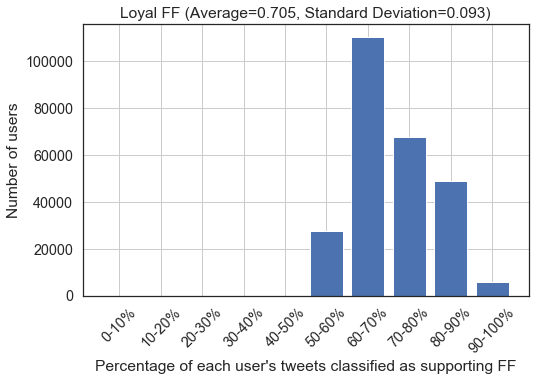

In [64]:
plt.figure(figsize=(8, 5))
plt.bar(range(len(distribution_of_n_of_tweets)), distribution_of_n_of_tweets)
plt.xticks(range(len(distribution_of_n_of_tweets)),
           ["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-80%", "80-90%", "90-100%"], rotation=45)
plt.grid()
plt.title("Loyal FF (Average=0.705, Standard Deviation=0.093)")
plt.ylabel("Number of users")
plt.xlabel("Percentage of each user's tweets classified as supporting FF")
plt.savefig("fig/chart25-1.pdf", dpi=300, bbox_inches ='tight')
plt.show()

In [65]:
distribution_of_n_of_tweets = [0] * 10
dist = []
n = 0
for u, v in tqdm(opinion_tweets.items()):
    if u not in uid_loyalMP or (v["K"] + v["M"]) <= 0:
        continue
    if v["I"] > 0:
        continue
    prop = v["M"] / (v["K"] + v["M"])
    dist.append(prop)
    index = int(prop * 10)
    try:
        distribution_of_n_of_tweets[index] += 1
    except:
#         print(prop, index, v["K"] + v["M"])
        n += 1
n

0

In [66]:
pd.Series(dist).describe()

count    189817.000000
mean          0.696054
std           0.093259
min           0.501684
25%           0.625000
50%           0.666667
75%           0.750000
max           0.990566
dtype: float64

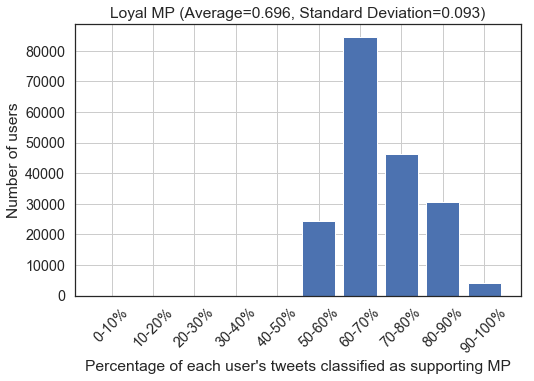

In [67]:
plt.figure(figsize=(8, 5))
plt.bar(range(len(distribution_of_n_of_tweets)), distribution_of_n_of_tweets)
plt.xticks(range(len(distribution_of_n_of_tweets)),
           ["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-80%", "80-90%", "90-100%"], rotation=45)
plt.grid()
plt.title("Loyal MP (Average=0.696, Standard Deviation=0.093)")
plt.ylabel("Number of users")
plt.xlabel("Percentage of each user's tweets classified as supporting MP")
plt.savefig("fig/chart25-2.pdf", dpi=300, bbox_inches ='tight')
plt.show()

In [68]:
distribution_of_n_of_tweets

[0, 0, 0, 0, 0, 24352, 84526, 46184, 30567, 4188]

# FIG 1 & 2

hashtag and topic distribution

# FIG 3

In [69]:
from SQLite_handler2 import predict_dir_to_csv

In [ ]:
start = pendulum.datetime(2019, 3, 14, tz="UTC") # include this date
end = pendulum.datetime(2019, 10, 11, tz="UTC") # include this date
predict_dir_to_csv(start, end, in_dir="users-14days_v2", prob=0.66)

In [74]:
# data = pd.read_csv(f"data/cul_start_3_0.64.csv").set_index("dt")
data = pd.read_csv(f"data/users-14days_v2_0.66.csv").set_index("dt")

data.index = pd.to_datetime(data.index)
data = data.div(data.sum(axis=1), axis=0)
data = data.round(3) * 100

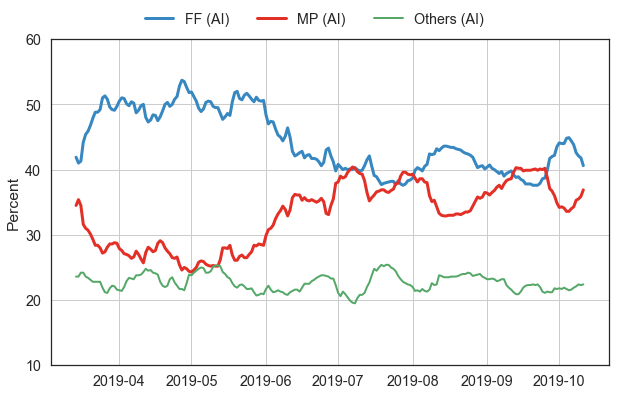

In [75]:
sns.set(style="white", font_scale=1.3)

plt.figure(figsize=(10, 6))
FF_c = sns.color_palette("Blues_d", 7)
MP_c = sns.color_palette("Reds_d", 7)

plt.plot(data["FF"], lw=3, label=f"FF (AI)", color=FF_c[3])
plt.plot(data["MP"], lw=3, label=f"MP (AI)", color=MP_c[3])
plt.plot(data["Others"], lw=2, label=f"Others (AI)", color="g")

plt.grid()
plt.legend(loc=4, bbox_to_anchor=(0.8, 1), ncol=3, frameon=False)
plt.ylabel("Percent")
plt.ylim(10, 60)
plt.xlabel("")
plt.savefig("fig/fig3.pdf", dpi=300, bbox_inches ='tight')
plt.show()

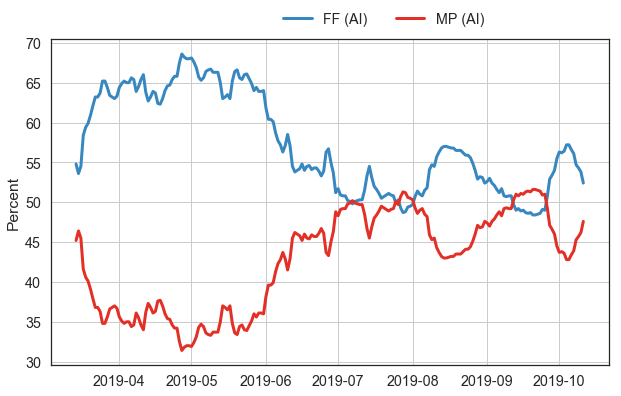

In [77]:
# data = pd.read_csv(f"data/cul_start_3_0.64.csv").set_index("dt")
data = pd.read_csv(f"data/users-14days_v2_0.66.csv").set_index("dt")

data.index = pd.to_datetime(data.index)
data = data[["FF", "MP"]]
data = data.div(data.sum(axis=1), axis=0)
data = data.round(3) * 100

sns.set(style="white", font_scale=1.3)

plt.figure(figsize=(10, 6))
FF_c = sns.color_palette("Blues_d", 7)
MP_c = sns.color_palette("Reds_d", 7)

plt.plot(data["FF"], lw=3, label=f"FF (AI)", color=FF_c[3])
plt.plot(data["MP"], lw=3, label=f"MP (AI)", color=MP_c[3])

plt.grid()
plt.legend(loc=4, bbox_to_anchor=(0.8, 1), ncol=3, frameon=False)
plt.ylabel("Percent")
plt.ylim(25, 60)
plt.xlabel("")
plt.savefig("fig/fig3-2.pdf", dpi=300, bbox_inches ='tight')
plt.show()

# FIG 4 & 5

in the end of PASO.ipynb

# chart 29-32

In [78]:
data = [json.loads(line.strip()) for line in open("data/stat_v2.json")]

In [79]:
data = pd.DataFrame(data).set_index("dt")

In [80]:
data.tail(1)

,K_tweet_count,K_user_count,M_tweet_count,M_user_count,classified_tweet_count,classified_user_count,tweet_count,user_count
dt,,,,,,,,
2019-10-11,76439,26790,106991,31170,183430,57960,243885,75084


In [86]:
data.sum()

K_tweet_count             20864943
K_user_count               7079926
M_tweet_count             23758353
M_user_count               6530038
classified_tweet_count    44623296
classified_user_count     13609964
tweet_count               58438218
user_count                17600918
dtype: int64

In [81]:
data.index = pd.to_datetime(data.index)

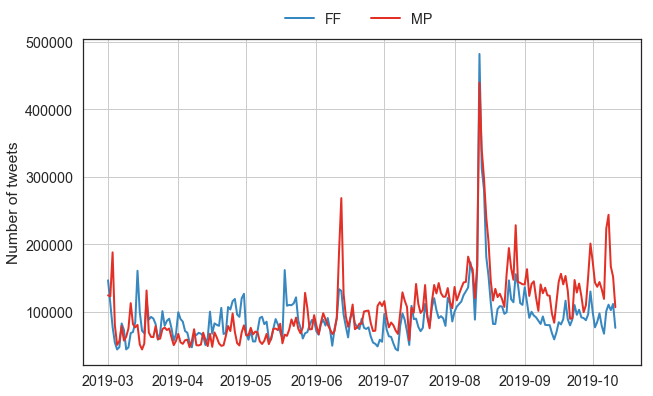

In [82]:
sns.set(style="white", font_scale=1.3)

plt.figure(figsize=(10, 6))
FF_c = sns.color_palette("Blues_d", 7)
MP_c = sns.color_palette("Reds_d", 7)

plt.plot(data["K_tweet_count"], lw=2, label=f"FF", color=FF_c[3])
plt.plot(data["M_tweet_count"], lw=2, label=f"MP", color=MP_c[3])

plt.grid()
plt.legend(loc=4, bbox_to_anchor=(0.65, 1), ncol=3, frameon=False)
plt.ylabel("Number of tweets")
plt.xlabel("")
plt.savefig("fig/chart29.pdf", dpi=300, bbox_inches ='tight')
plt.show()

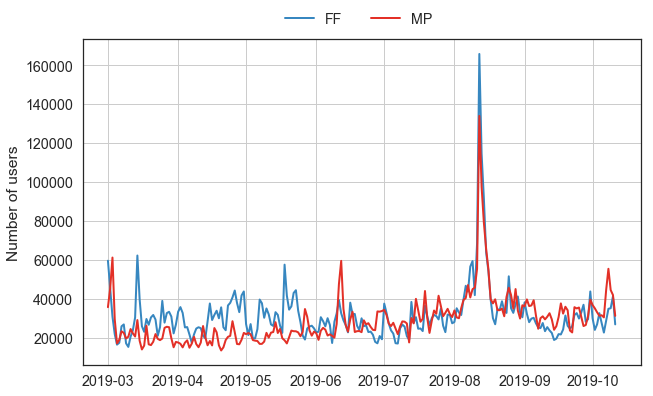

In [83]:
sns.set(style="white", font_scale=1.3)

plt.figure(figsize=(10, 6))
FF_c = sns.color_palette("Blues_d", 7)
MP_c = sns.color_palette("Reds_d", 7)

plt.plot(data["K_user_count"], lw=2, label=f"FF", color=FF_c[3])
plt.plot(data["M_user_count"], lw=2, label=f"MP", color=MP_c[3])

plt.grid()
plt.legend(loc=4, bbox_to_anchor=(0.65, 1), ncol=3, frameon=False)
plt.ylabel("Number of users")
plt.xlabel("")
plt.savefig("fig/chart30.pdf", dpi=300, bbox_inches ='tight')
plt.show()

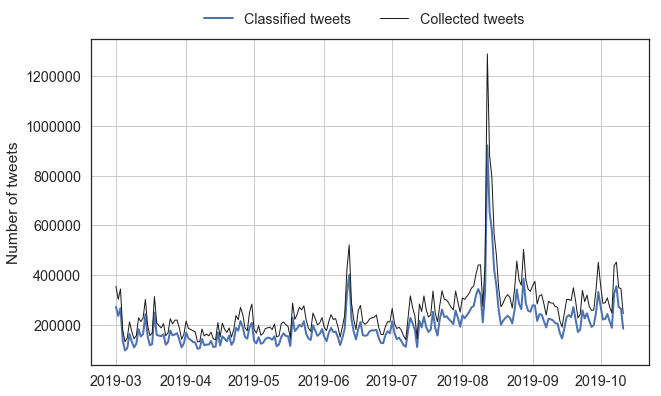

In [84]:
sns.set(style="white", font_scale=1.3)

plt.figure(figsize=(10, 6))
FF_c = sns.color_palette("Blues_d", 7)
MP_c = sns.color_palette("Reds_d", 7)

plt.plot(data["classified_tweet_count"], lw=2, label=f"Classified tweets", color="b")
plt.plot(data["tweet_count"], lw=1, label=f"Collected tweets", color="k")

plt.grid()
plt.legend(loc=4, bbox_to_anchor=(0.8, 1), ncol=3, frameon=False)
plt.ylabel("Number of tweets")
plt.xlabel("")
plt.savefig("fig/chart31.pdf", dpi=300, bbox_inches ='tight')
plt.show()

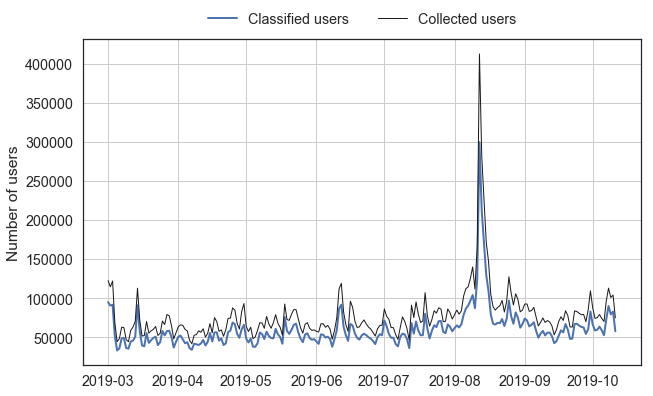

In [85]:
sns.set(style="white", font_scale=1.3)

plt.figure(figsize=(10, 6))
FF_c = sns.color_palette("Blues_d", 7)
MP_c = sns.color_palette("Reds_d", 7)

plt.plot(data["classified_user_count"], lw=2, label=f"Classified users", color="b")
plt.plot(data["user_count"], lw=1, label=f"Collected users", color="k")

plt.grid()
plt.legend(loc=4, bbox_to_anchor=(0.8, 1), ncol=3, frameon=False)
plt.ylabel("Number of users")
plt.xlabel("")
plt.savefig("fig/chart32.pdf", dpi=300, bbox_inches ='tight')
plt.show()